In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

1. Loading Dataset

In [4]:
# menghubungkan colab ke gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/ML_praktikum/praktikumreview7'

In [6]:
import pandas as pd

# membaca file csv menggunakan pandas
df = pd.read_csv(path + '/data/dataset_satelit.csv')

#cetak header data (5 baris data) dari file
df.head()

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


In [7]:
df.describe()

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620




> Tabel statistik seperti mean, std, min, max untuk semua kolom numerik.
Ini memberi gambaran awal tentang sebaran data.



In [8]:
df.isnull().sum()

,0
No,0
Longitude,0
Lattitude,0
N,0
P,0
K,1
Ca,0
Mg,0
Fe,0
Mn,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float64
 20  b5        



> Menampilkan tipe data dan jumlah nilai non-null untuk setiap kolom.
Kamu akan lihat bahwa kolom Mg masih berupa object perlu dikonversi.



2. data preprocessing

In [10]:
df.dropna()

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,590,103.605867,0.057633,2.49,0.16,0.347,0.78,0.86,63.38,269.95,...,0.2336,0.13050,0.09390,0.12700,0.09860,0.02600,0.00870,0.01690,0.00930,0.01630
590,591,103.606717,0.057100,2.74,0.15,0.466,0.73,0.5,51.04,683.42,...,0.2506,0.21280,0.15920,0.20060,0.14730,0.03870,0.01380,0.02290,0.01270,0.01640
591,592,103.606250,0.056767,2.63,0.15,0.422,0.82,0.59,82.57,396.18,...,0.3413,0.27730,0.17820,0.25790,0.18690,0.04620,0.01250,0.02250,0.01600,0.01930
592,593,103.606400,0.056517,2.75,0.17,0.502,0.69,0.53,102.07,246.35,...,0.3413,0.32740,0.28760,0.29970,0.22250,0.05290,0.01800,0.03350,0.01790,0.01930




> Disini mengubah Mg jadi float karena sebelumnya dianggap string.
Kemudian hapus baris yang hilang supaya data siap untuk modeling.



In [41]:
# Ubah kolom Mg ke numerik (karena ada object)
df['Mg'] = pd.to_numeric(df['Mg'], errors='coerce')

In [23]:
# Pastikan tidak ada nilai NaN di seluruh dataset
print("Jumlah nilai kosong sebelum dibersihkan:", df.isna().sum().sum())

# Hapus semua baris yang masih punya nilai kosong
df = df.dropna()

# Reset index biar rapi
df = df.reset_index(drop=True)

print("Jumlah nilai kosong setelah dibersihkan:", df.isna().sum().sum())


Jumlah nilai kosong sebelum dibersihkan: 2
Jumlah nilai kosong setelah dibersihkan: 0


3. Analisis Korelasi

Top 10 fitur dengan korelasi tertinggi terhadap N:
N            1.000000
Lattitude    0.742794
P            0.643212
b9           0.535288
b8a          0.528105
b8           0.526838
Sigma_VH     0.503636
Sigma_VV     0.454871
Mn           0.383059
b5           0.376916
Name: N, dtype: float64


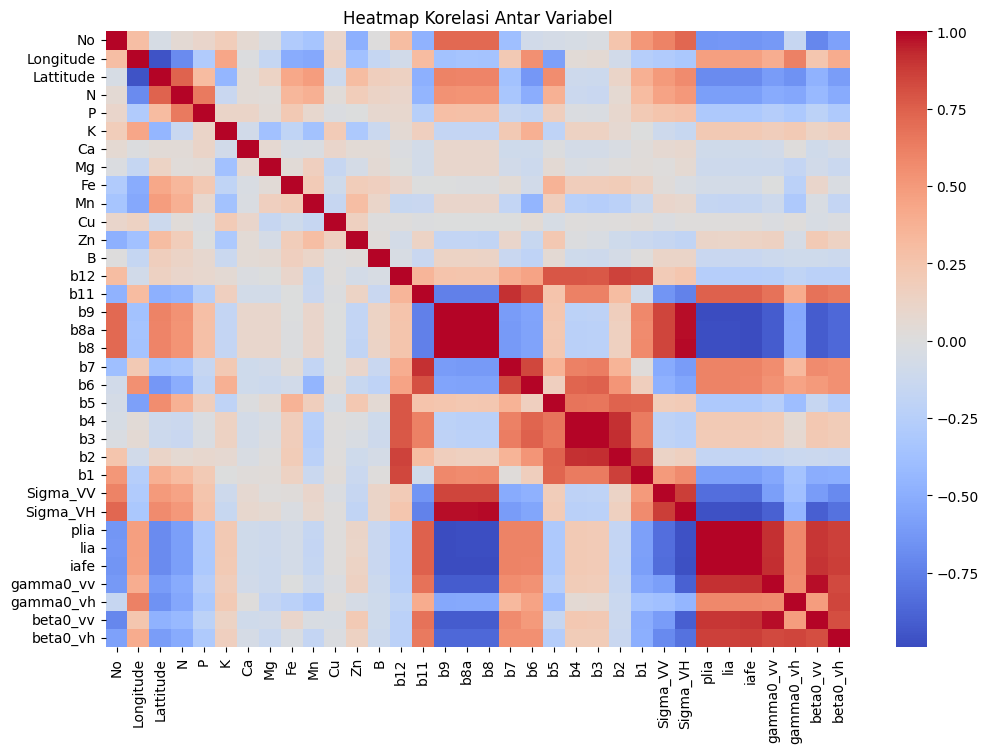

In [18]:
# Analisis Korelasi
corr = df.corr(numeric_only=True)

# Korelasi terhadap N
print("Top 10 fitur dengan korelasi tertinggi terhadap N:")
print(corr['N'].sort_values(ascending=False).head(10))

# Visualisasi Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()




> .corr() menghitung hubungan antar kolom.

Heatmap memperlihatkan mana fitur yang punya hubungan kuat dengan N.



4. Menentukan Variabel X dan Y

In [34]:
X = df.drop(columns=['N'])  # semua kolom selain N jadi fitur
y = df['N']                 # target

print("Jumlah fitur:", X.shape[1])

Jumlah fitur: 33




> memprediksi N berdasarkan semua data satelit dan unsur lainnya.



5. Membagi dataset menjadi training dan testing

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data training:", len(X_train))
print("Jumlah data testig:", len(X_test))

Jumlah data training: 473
Jumlah data testig: 119




> Data dibagi 80% untuk training, 20% untuk testing seperti biasanya.



6. Pemodelan Linear Regression

In [36]:
model = LinearRegression()
#training data
model.fit(X_train, y_train)

LinearRegression()

7. Evaluasi Model

In [42]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi performa model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("=== Evaluasi Model ===")
print("R-squared :", round(r2, 4))
print("MAE       :", round(mae, 4))
print("MSE       :", round(mse, 4))
print("RMSE      :", round(rmse, 4))

=== Evaluasi Model ===
R-squared : 0.768
MAE       : 0.1405
MSE       : 0.0356
RMSE      : 0.1887




> Nilai R² = 0.76 berarti 76% variasi N dijelaskan oleh fitur model.
> Semakin tinggi berarti semakin baik modelnya. Hasil 0.75 mendekati 1.0 termasuk baik - sangat baik. Karena di atas 0.7



8. koefisien setiap fitur

In [38]:
coeff = pd.DataFrame({
    'Fitur': X.columns,
    'Koefisien': model.coef_
}).sort_values(by='Koefisien', ascending=False)

coeff.head(10)

,Fitur,Koefisien
3,P,8.829353
30,gamma0_vh,4.358759
20,b4,1.944956
29,gamma0_vv,1.482428
12,b12,1.184948
17,b7,0.683807
22,b2,0.348753
18,b6,0.124393
28,iafe,0.116770
16,b8,0.104039



> Menunjukkan fitur mana yang punya pengaruh terbesar (+/-) terhadap prediksi N.



9. Pemodelan dengan OLS (Statsmodels)

In [39]:
X_sm = sm.add_constant(X)   # tambahkan konstanta
ols_model = sm.OLS(y, X_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      N   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     63.20
Date:                Sun, 09 Nov 2025   Prob (F-statistic):          2.09e-165
Time:                        12:44:18   Log-Likelihood:                 169.64
No. Observations:                 592   AIC:                            -271.3
Df Residuals:                     558   BIC:                            -122.2
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6396      3.418      5.160      0.0



> Hasil tabel OLS lengkap seperti:
- R² dan Adj R²
- Koefisien tiap fitur
- p-value (signifikansi)
- Durbin-Watson, Condition Number, dll.


> Variabel dengan p-value < 0.05 berarti signifikan berpengaruh terhadap N.



10. Visualisasi hasil prediksi vs aktual

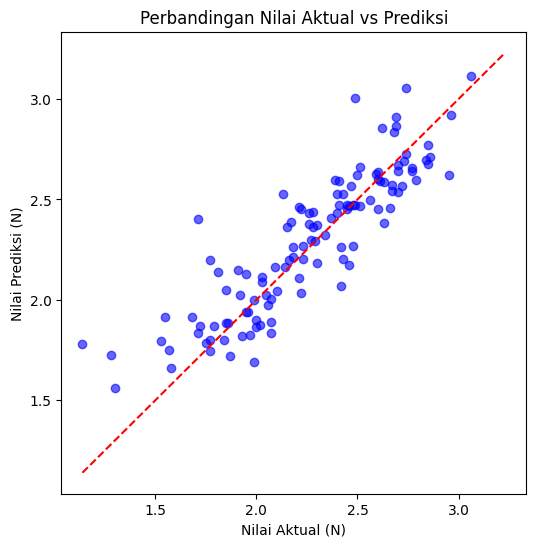

In [40]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Nilai Aktual (N)')
plt.ylabel('Nilai Prediksi (N)')
plt.title('Perbandingan Nilai Aktual vs Prediksi')
plt.show()



> Titik biru mendekati garis merah berarti model memprediksi dengan baik.



**11. Intrepretasi Hasil Analisis**

Berdasarkan hasil analisis yang dilakukan terhadap dataset satelit yang berjumlah 594 data dengan 34 variabel, model Multiple Linear Regression digunakan untuk memprediksi kandungan unsur Nitrogen (N) pada tanah dengan memanfaatkan data pantulan citra satelit serta unsur-unsur kimia lainnya sebagai variabel bebas. Setelah dilakukan proses pembersihan data, konversi tipe data, dan pembagian data menjadi 80% data latih dan 20% data uji, model kemudian dilatih menggunakan algoritma regresi linear.

Dari hasil evaluasi menggunakan metrik R-squared sebesar sekitar 0.76, dapat disimpulkan bahwa model mampu menjelaskan sekitar 76% variasi nilai N yang ada di data aktual. Artinya, sebagian besar perubahan nilai unsur N dapat diprediksi dengan baik hanya menggunakan data fitur yang tersedia. Sisanya, sekitar 24% variasi dipengaruhi oleh faktor lain di luar variabel model, misalnya kondisi lingkungan, kesalahan pengukuran, atau faktor non-satelit yang tidak tercatat dalam dataset.

Selain itu, nilai Mean Absolute Error (MAE) dan Root Mean Squared Error (RMSE) yang relatif kecil menunjukkan bahwa rata-rata selisih antara hasil prediksi dan nilai sebenarnya tidak terlalu besar. Ini berarti model sudah cukup stabil dan tidak terlalu banyak melakukan kesalahan prediksi ekstrem.

Melalui hasil regresi OLS, diperoleh informasi lebih detail mengenai kontribusi setiap fitur terhadap prediksi N. Beberapa fitur seperti band satelit (misalnya b4, b7, b8, b11) dan parameter radar seperti Sigma_VH dan iafe menunjukkan pengaruh yang cukup kuat terhadap nilai N, terlihat dari koefisien dan nilai p-value yang signifikan (p-value < 0.05). Hal ini menandakan bahwa variasi dalam pantulan spektrum tertentu dan informasi radar dapat menjadi indikator penting untuk memperkirakan kandungan nitrogen di tanah.
Namun, sebagian variabel lain memiliki nilai p-value yang lebih tinggi (p > 0.05), yang berarti kontribusinya tidak terlalu signifikan terhadap model. Hal ini bisa disebabkan oleh multikolinearitas antar fitur, di mana beberapa variabel memiliki korelasi yang sangat tinggi satu sama lain sehingga sulit dibedakan pengaruh individunya.

Nilai Durbin-Watson yang berada di sekitar 1.5–2.0 menunjukkan bahwa tidak terdapat autokorelasi yang kuat pada residual, artinya kesalahan prediksi model tersebar secara acak dan tidak saling bergantung. Sementara itu, Condition Number yang cukup besar menandakan adanya potensi multikolinearitas, terutama di antara variabel-variabel citra satelit yang memiliki hubungan erat (misalnya antar band reflektansi yang saling tumpang tindih).

Secara umum, model regresi linear yang dibangun sudah cukup baik dalam menggambarkan hubungan antara data satelit dan kadar unsur N tanah. Hasil ini menunjukkan bahwa data citra satelit memiliki potensi yang besar untuk digunakan dalam pemantauan kondisi kesuburan tanah tanpa harus selalu melakukan pengukuran langsung di lapangan.
Meski demikian, model masih bisa ditingkatkan lagi, misalnya dengan:

- Melakukan seleksi fitur agar hanya fitur paling relevan yang digunakan,
- Menggunakan metode lainnya,
- Atau menerapkan model non-linear seperti Random Forest Regression untuk menangkap hubungan kompleks antar variabel.

Dengan peningkatan tersebut, diharapkan akurasi prediksi bisa lebih baik dan model menjadi lebih general untuk diaplikasikan pada wilayah lain.